# Alpha Beta Gamma Filter

Referring to Section 9.1.2, if the velocity is changing due to target acceleration, the alpha-beta filter needs to be extended to also include the acceleration.  This leads to the alpha-beta-gamma filter.   In this extension, the velocity is obtained from integrating the acceleration.  An equation for the acceleration must then be added to the state equations, and a third parameter, $\gamma$, is chosen to apply adjustments to the new state estimates. Assuming the acceleration remains fixed over the time interval between measurements, the position is projected forward in time to predict its value at the next sampling time.

The Python sample code for the alpha beta gamma filter is given in Listing 9.2

Set the start, step and end times (s)

In [10]:
start = 0.0

end = 100.0

step = 0.1

Calculate the number of updates and create the time array with the `linspace` routine from `scipy`

In [11]:
from scipy import linspace

number_of_updates = round( (end - start) / step) + 1

t, dt = linspace(start, end, number_of_updates, retstep=True)

Set the initial position (m), initial velocity (m/s) and initial acceleration (m/s/s)

In [12]:
initial_position = 1.3

initial_velocity = 3.5

initial_acceleration = 3.0

Set the noise variance and the factors (alpha, beta) for the filter

In [13]:
noise_variance = 10.0

alpha = 0.06

beta = 0.0018

gamma = 2.75e-5

Calculate the true position and velocity

In [14]:
v_true = initial_velocity + initial_acceleration * t

x_true = initial_position + initial_velocity * t + 0.5 * initial_acceleration * t ** 2

Create the measurements using the random number routines from `scipy`

In [15]:
from scipy import random, sqrt

z = x_true + sqrt(noise_variance) * (random.rand(number_of_updates) - 0.5)

Initialize the state and create the empty filter estimates

In [16]:
xk_1 = 0.0

vk_1 = 0.0

ak_1 = 0.0


x_filt = []

v_filt = []

a_filt = []

r_filt = []

Perform the alpha-beta-gamma filtering

In [17]:
# Loop over all measurements

for zk in z:

    # Predict the next state

    xk = xk_1 + vk_1 * dt + 0.5 * ak_1 * dt ** 2

    vk = vk_1 + ak_1 * dt

    ak = ak_1


    # Calculate the residual

    rk = zk - xk


    # Correct the predicted state

    xk += alpha * rk

    vk += beta / dt * rk

    ak += 2.0 * gamma / dt ** 2 * rk


    # Set the current state as previous

    xk_1 = xk

    vk_1 = vk

    ak_1 = ak


    x_filt.append(xk)

    v_filt.append(vk)

    a_filt.append(ak)

    r_filt.append(rk)

Display the results of the alpha beta gamma filter using the `matplotlib` routines

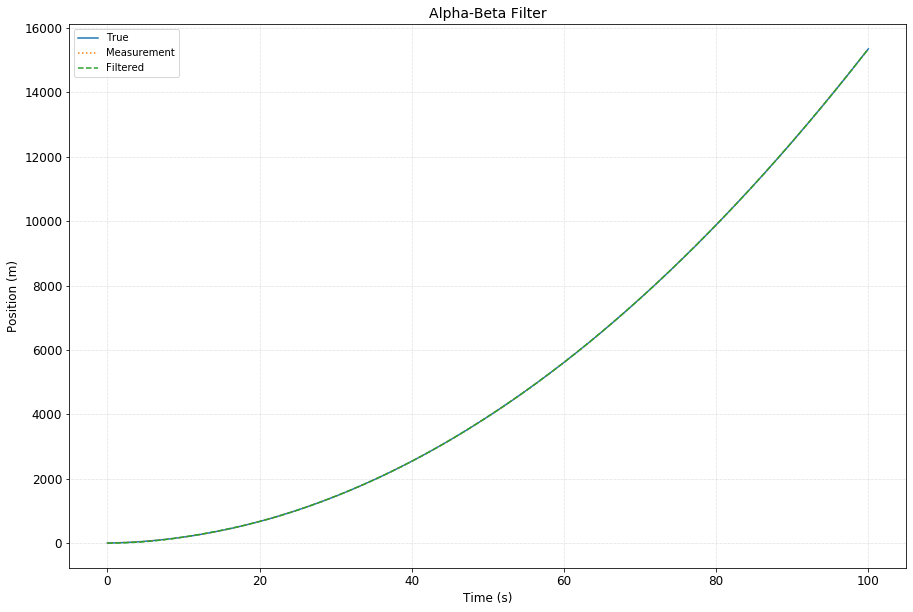

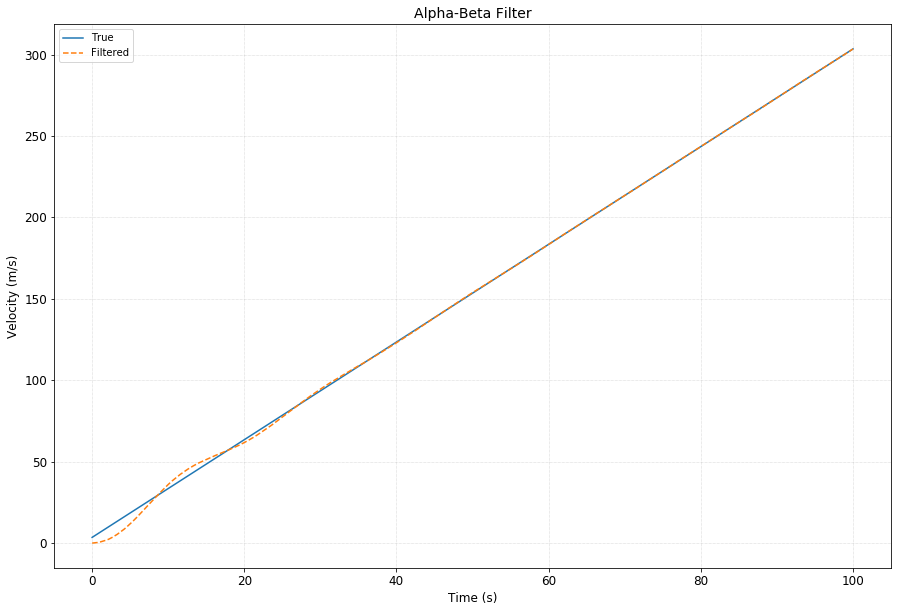

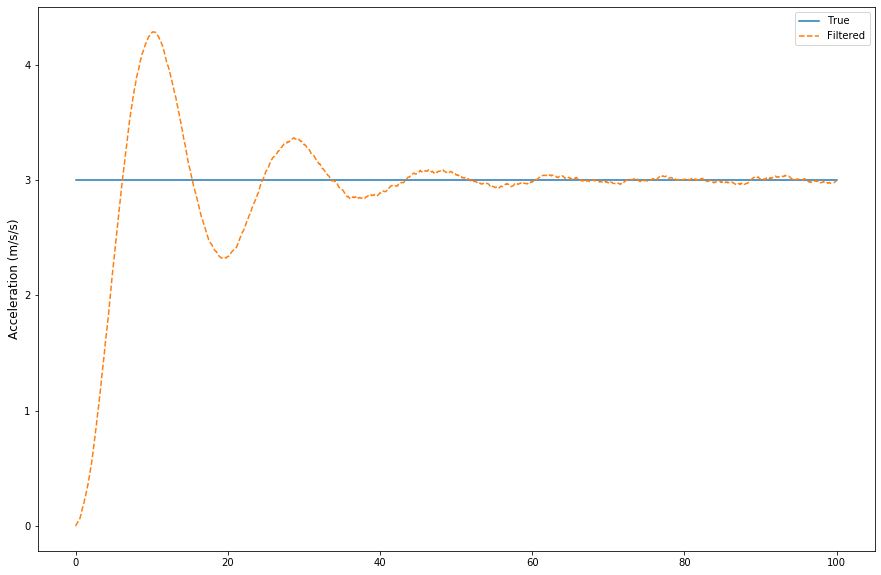

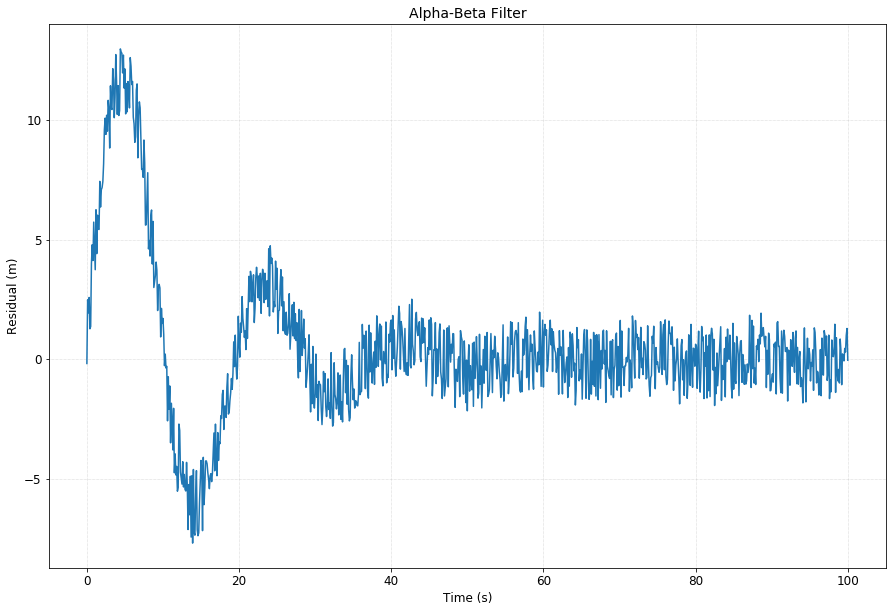

In [18]:
from matplotlib import pyplot as plt

from scipy import ones_like


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Position

plt.figure()

plt.plot(t, x_true, '', label='True')

plt.plot(t, z, ':', label='Measurement')

plt.plot(t, x_filt, '--', label='Filtered')

plt.ylabel('Position (m)', size=12)

plt.legend(loc='best', prop={'size': 10})

# Set the plot title and labels

plt.title('Alpha-Beta Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Velocity
    
plt.figure()

plt.plot(t, v_true, '', label='True')

plt.plot(t, v_filt, '--', label='Filtered')

plt.ylabel('Velocity (m/s)', size=12)

plt.legend(loc='best', prop={'size': 10})


# Set the plot title and labels

plt.title('Alpha-Beta Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Acceleration

plt.figure()

plt.plot(t, initial_acceleration * ones_like(t), '', label='True')

plt.plot(t, a_filt, '--', label='Filtered')

plt.ylabel('Acceleration (m/s/s)', size=12)

plt.legend(loc='best', prop={'size': 10})



# Residual

plt.figure()

plt.plot(t, r_filt, '')

plt.ylabel('Residual (m)', size=12)


# Set the plot title and labels

plt.title('Alpha-Beta Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)